In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

## Prerequisite: stationarity
Before getting deeper into random walks, we need to define what is stationarity.
A sequence is stationary if it does not vary in time (in mean and variance). 
For instance, a sequence of gaussian white noise generated points.
Let's create for illustration a stationary and a non-stationary sequence
plus a function to print then on the same plot.

In time series analysis, this is a major hypothesis because it allows ones to tell that the future can be predicted from the earliest points

In [14]:
def simulate_process(is_stationary: bool) -> np.array:
    np.random.seed(42)
    process = np.empty(400)
    
    if is_stationary:
        alpha = 0.5
        process[0] = 0
    else:
        alpha = 1
        process[0] = 10
        
    for i in range(400):
        if i+1 < 400:
            process[i+1] = alpha*process[i] + np.random.standard_normal()
        else:
            break
        
    return process

def double_print(_stationary,_non_stationary):
    _fig, _ax = plt.subplots()

    _ax.plot(_stationary, linestyle='-', label='stationary')
    _ax.plot(_non_stationary, linestyle='--', label='non-stationary')
    _ax.set_xlabel('Timesteps')
    _ax.set_ylabel('Value')
    _ax.legend(loc=2)
    plt.tight_layout()

let's plot these two series 

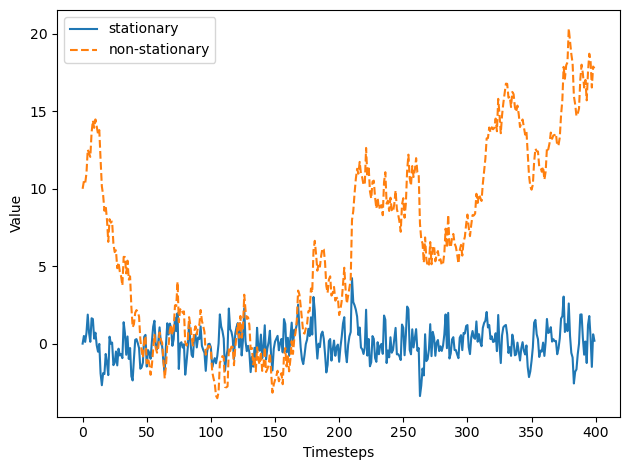

In [15]:
stationary = simulate_process(True)
non_stationary = simulate_process(False)
double_print(stationary,non_stationary)

Now, let's evaluate the mean and the variance of these two 

In [16]:
def mean_over_time(process: np.array) -> np.array:
    mean_func = []
    
    for i in range(len(process)):
        mean_func.append(np.mean(process[:i]))
    
    return mean_func

def var_over_time(process: np.array) -> np.array:
    var_func = []
    
    for i in range(len(process)):
        var_func.append(np.var(process[:i]))
    
    return var_func

/Users/mickaelwajnberg/.conda/envs/time_series/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/mickaelwajnberg/.conda/envs/time_series/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


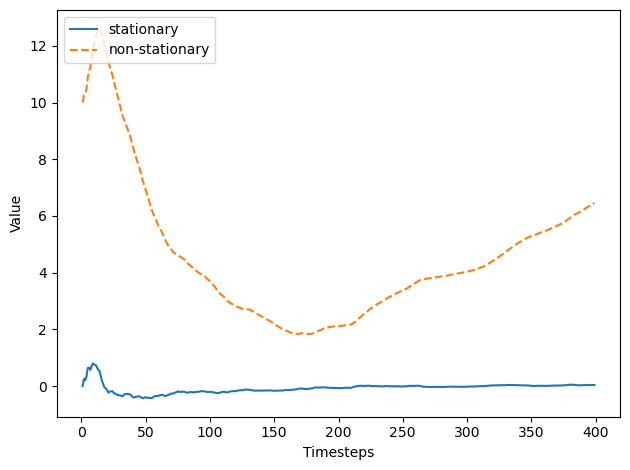

In [17]:
stationary_mean = mean_over_time(stationary)
non_stationary_mean = mean_over_time(non_stationary)
double_print(stationary_mean,non_stationary_mean)

/Users/mickaelwajnberg/.conda/envs/time_series/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/mickaelwajnberg/.conda/envs/time_series/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/mickaelwajnberg/.conda/envs/time_series/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


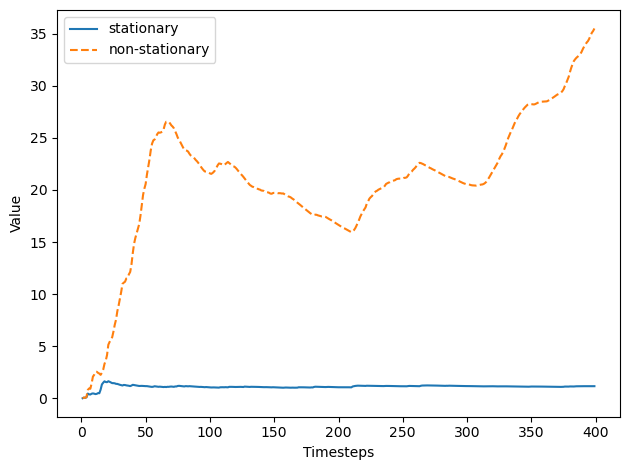

In [18]:
stationary_var = var_over_time(stationary)
non_stationary_var = var_over_time(non_stationary)
double_print(stationary_var,non_stationary_var)

Clearly, the stationary keeps variance and mean similar during all time 

## Random walk
A random walk is defined as a sequence y_{t+1} = C + y_{t} + e_t
where C is a constant and e is randomly generated 

put in other words, it is a serie whose first difference is stationary and uncorrelated (it moves at random)
let's create a C=0 random walk starting at 0 

In [ ]:
np.random.seed(42)
steps = np.random.standard_normal(1000)
steps[0]=0
random_walk = np.cumsum(steps)

fig, ax = plt.subplots()
ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
plt.tight_layout()


The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine whether a given time series is stationary. Stationarity is an important property in time series analysis, indicating that the statistical properties of the series (like mean, variance) do not change over time. The ADF test specifically tests for the presence of a unit root, a condition that would make a time series non-stationary.

Components of the ADF Test:
Null Hypothesis (H0): The time series has a unit root, meaning it is non-stationary.
Alternative Hypothesis (H1): The time series does not have a unit root, meaning it is stationary.
Test Statistic: Calculated based on the regression model that includes lagged values of the time series and, in augmented versions, lagged differences of the series.
Critical Values: These values are used to determine whether the test statistic is sufficiently extreme to reject the null hypothesis. They depend on the sample size and desired confidence level.
Interpretation:
If the test statistic is less than the critical value (for a given significance level), we reject the null hypothesis, suggesting the series is stationary.
If the test statistic is greater than the critical value, we fail to reject the null hypothesis, suggesting the series is non-stationary.

Link with Auto-correlation:
Auto-correlation refers to the correlation of a time series with its own past values.
Non-stationary time series often exhibit high auto-correlation, especially if they contain a unit root. This is because the value at a given time is highly dependent on its previous values.
The ADF test partly addresses this by including lagged differences of the series in its regression model, helping to account for and measure the extent of auto-correlation.


In summary, the Augmented Dickey-Fuller test is a crucial tool in time series analysis to test for stationarity, particularly useful in the presence of auto-correlation. Interpreting its results correctly is vital for subsequent analysis, such as forecasting, as many statistical models require the input time series to be stationary.


ADF Statistic: -0.965952487691875
p-value: 0.7654789696692581


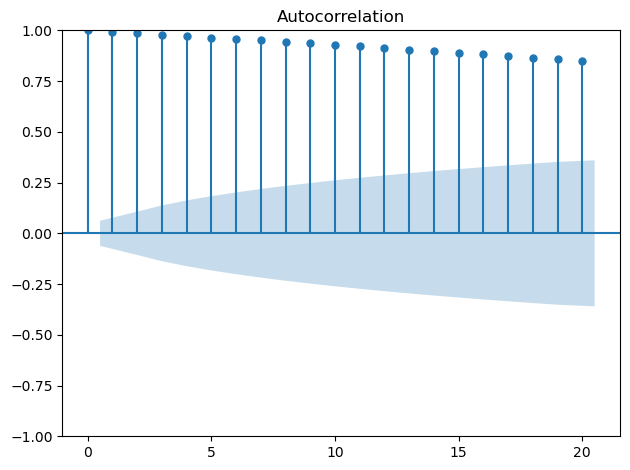

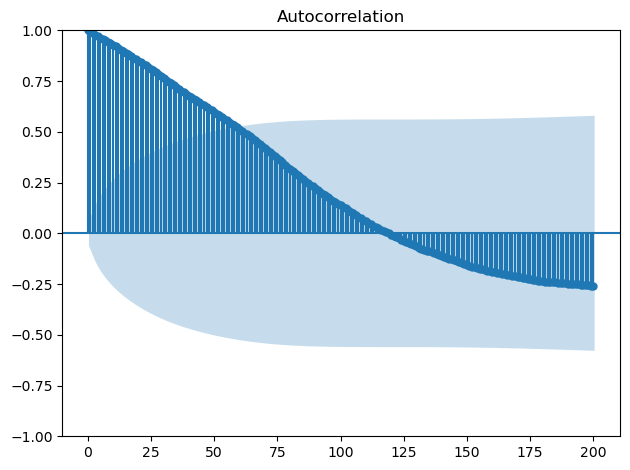

In [22]:
ADF_result = adfuller(random_walk)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')
plot_acf(random_walk, lags=20)
plt.tight_layout()
plot_acf(random_walk, lags=200)
plt.tight_layout()

Coefficients of auto-correlation decrease very slowly over time, which means that the points are dependent on their predecessors, therefore it is not stationary since time matters. 
The shaded area in the plot represents the confidence interval, usually at the 95% confidence level, under the null hypothesis of no auto-correlation. This means that any auto-correlation values that fall outside this shaded area are statistically significant at the 5% significance level.
Said on the reverse point of view: If an auto-correlation coefficient lies within the shaded area, it's not significantly different from zero, implying no auto-correlation at that lag. If it lies outside the shaded area, it indicates significant auto-correlation at that lag.

In a stationary series, the auto-correlations typically decrease rapidly to zero. If the auto-correlation values drop off quickly after a few lags, it suggests that the series does not depend much on its past values, which is a sign of stationarity.

but auto-correlation is just a hint, you should still confirm with a more robust statistical test as ADF. here, ADF cannot reject the null hypothesis at p<0.05. 

but to determine if a sequence is a random walk, we have to check for stationarity of the first difference 

ADF Statistic: -31.789310857560594
p-value: 0.0


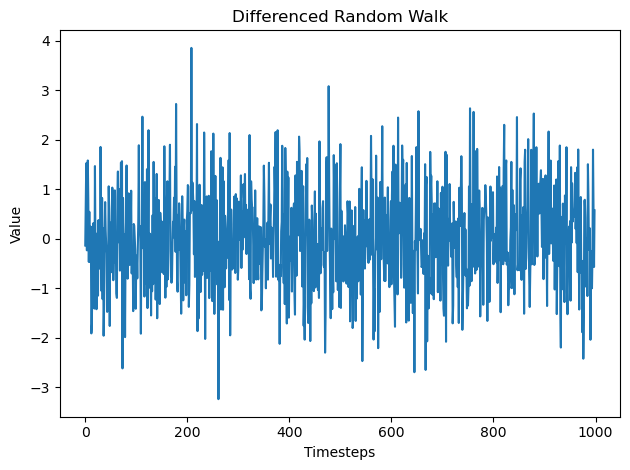

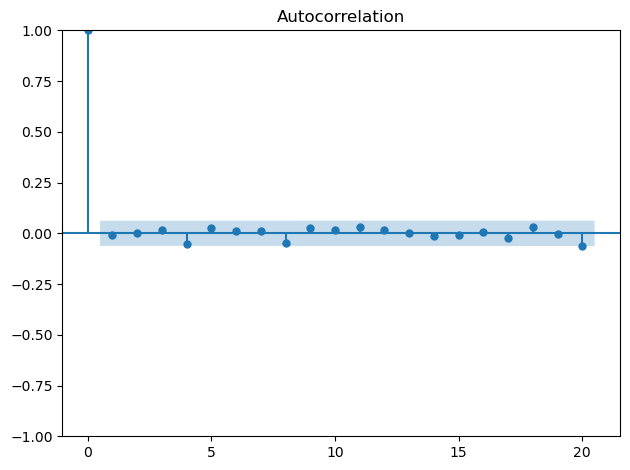

In [24]:
diff_random_walk = np.diff(random_walk, n=1)
plt.plot(diff_random_walk)
plt.title('Differenced Random Walk')
plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.tight_layout()
ADF_result = adfuller(diff_random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')
plot_acf(diff_random_walk, lags=20)

plt.tight_layout()

this time it seems we can be sure it is a randomwalk

## real case: google stock market 

In [25]:
df = pd.read_csv('data/GOOGL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600


ADF Statistic: 0.1602504866477126
p-value: 0.9699419435913057
ADF Statistic diff: -5.303439704295234
p-value: 5.3865309614545585e-06


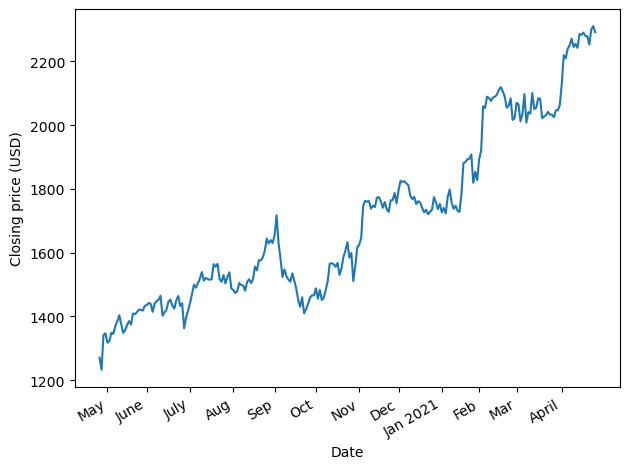

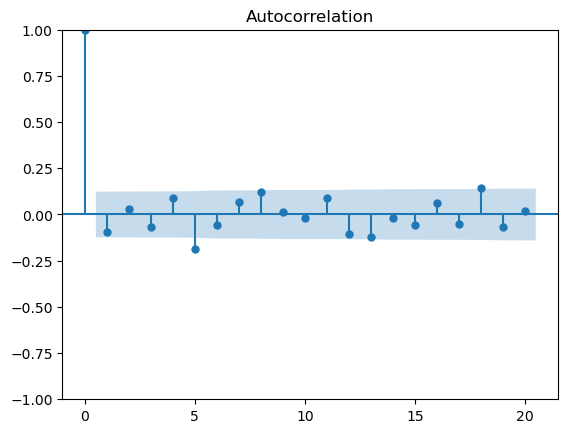

In [29]:
fig, ax = plt.subplots()

ax.plot(df['Date'], df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')

plt.xticks(
    [4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235], 
    ['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2021', 'Feb', 'Mar', 'April'])

fig.autofmt_xdate()
plt.tight_layout()

GOOGL_ADF_result = adfuller(df['Close'])
print(f'ADF Statistic: {GOOGL_ADF_result[0]}')
print(f'p-value: {GOOGL_ADF_result[1]}')

diff_close = np.diff(df['Close'], n=1)
GOOGL_diff_ADF_result = adfuller(diff_close)
print(f'ADF Statistic diff: {GOOGL_diff_ADF_result[0]}')
print(f'p-value: {GOOGL_diff_ADF_result[1]}')
plot_acf(diff_close, lags=20);

Yes, googl stock price is a random walk ... Now how to forcast something we just established as a random process ???
We cannot do much in that case, only the naive methods of mean, last known points, etc. We introduce here the drift. 
Also, the drift is taking the first point and last point of dataset and is creating a slope to make predictions. 

let's separate train and test set 

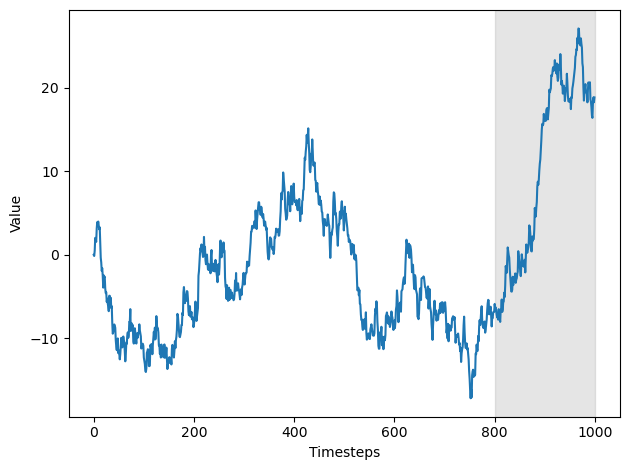

In [30]:
df = pd.DataFrame({'value': random_walk})

train = df[:800]
test = df[800:]
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.axvspan(800, 1000, color='#808080', alpha=0.2)

plt.tight_layout()

/var/folders/23/rr9tkydj3fj1lgvrw9qzlqqh0000gn/T/ipykernel_26713/153090013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_mean'] = mean
/var/folders/23/rr9tkydj3fj1lgvrw9qzlqqh0000gn/T/ipykernel_26713/153090013.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last'] = last_value
/var/folders/23/rr9tkydj3fj1lgvrw9qzlqqh0000gn/T/ipykernel_26713/153090013.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

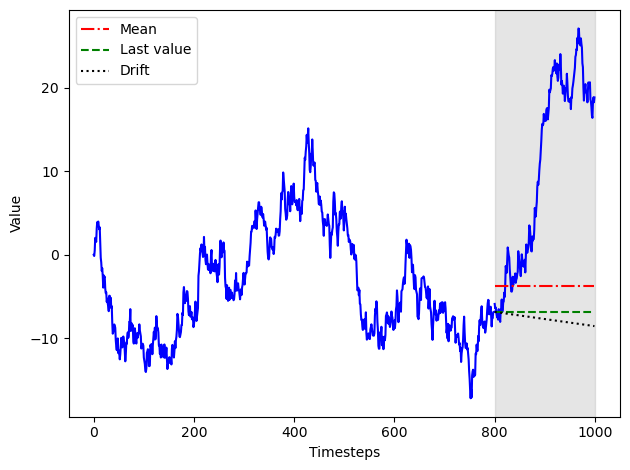

In [31]:
mean = np.mean(train.value)
test.loc[:, 'pred_mean'] = mean

last_value = train.iloc[-1].value
test.loc[:, 'pred_last'] = last_value

deltaX = 800 - 1
deltaY = last_value - 0
drift = deltaY / deltaX
x_vals = np.arange(801, 1001, 1)
pred_drift = drift * x_vals
test.loc[:, 'pred_drift'] = pred_drift

fig, ax = plt.subplots()
ax.plot(train.value, 'b-')
ax.plot(test['value'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last value')
ax.plot(test['pred_drift'], 'k:', label='Drift')
ax.axvspan(800, 1000, color='#808080', alpha=0.2)
ax.legend(loc=2)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

In the previous lesson, we evaluated the score with mape. In that case, we cannot because mape can start a division by 0. A more generally used metric would be the mean squared error. 

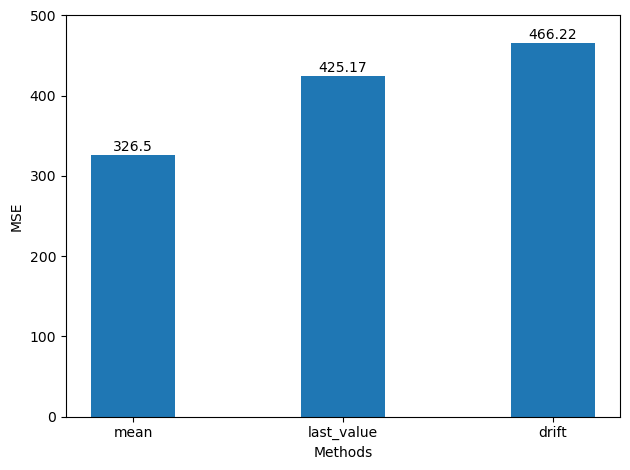

In [35]:
mse_mean = mean_squared_error(test['value'], test['pred_mean'])
mse_last = mean_squared_error(test['value'], test['pred_last'])
mse_drift = mean_squared_error(test['value'], test['pred_drift'])
fig, ax = plt.subplots()

x = ['mean', 'last_value', 'drift']
y = [mse_mean, mse_last, mse_drift]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('MSE')
ax.set_ylim(0, 500)

for index, value in enumerate(y):
    plt.text(x=index, y=value+5, s=str(round(value, 2)), ha='center')

plt.tight_layout()

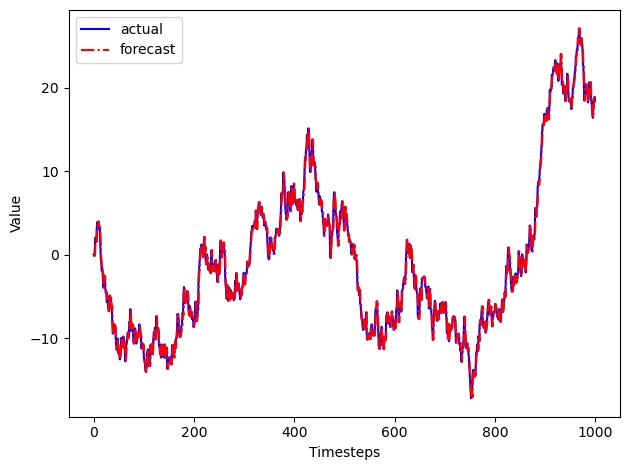

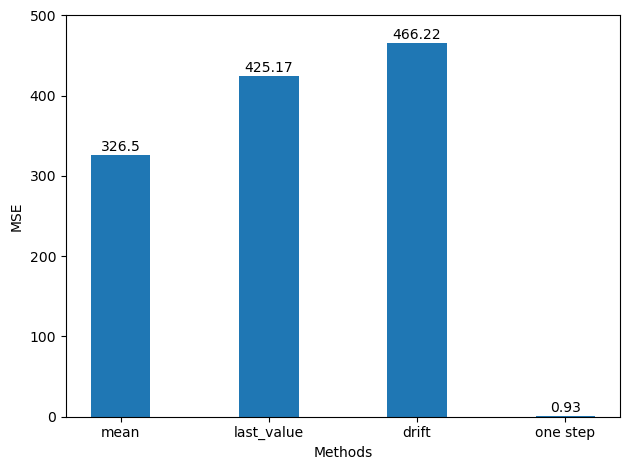

In [38]:
df_shift = df.shift(periods=1)
fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

mse_one_step = mean_squared_error(test['value'], df_shift[800:])


fig, ax = plt.subplots()

x = ['mean', 'last_value', 'drift','one step']
y = [mse_mean, mse_last, mse_drift,mse_one_step]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('MSE')
ax.set_ylim(0, 500)

for index, value in enumerate(y):
    plt.text(x=index, y=value+5, s=str(round(value, 2)), ha='center')

plt.tight_layout()



even if mse is good in the last one, it is still a very naive model and cannot predict long term 